# Lending Club Case Study

## Importing Necessary Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Load Data

In [3]:
#load the data
df = pd.read_csv("./dataset/loan.csv")
df.shape

(39717, 111)

## Data Cleaning 

1. Remove whitespaces from column names
2. Remove null values columns
3. Idenitify and remove columns with more than 60% missing values
4. Remove duolicate rows
5. Drop unnecessary columns

In [4]:
#removing white_spaces from the column names
df = df.rename(columns = lambda x: x.strip(), inplace=False)

In [5]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
#Remove null value columns
df.dropna(how='all', axis=1, inplace=True)
df.shape


(39717, 57)

In [7]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [8]:
# Idenitify columns with more than 60% missing values
missing_value_column_percentage = df.isnull().sum() * 100/ len(df)
round(missing_value_column_percentage.sort_values(ascending=False),0).head(20)

next_pymnt_d                  97.0
mths_since_last_record        93.0
mths_since_last_delinq        65.0
desc                          33.0
emp_title                      6.0
emp_length                     3.0
pub_rec_bankruptcies           2.0
last_pymnt_d                   0.0
chargeoff_within_12_mths       0.0
collections_12_mths_ex_med     0.0
revol_util                     0.0
tax_liens                      0.0
title                          0.0
last_credit_pull_d             0.0
home_ownership                 0.0
int_rate                       0.0
out_prncp_inv                  0.0
total_pymnt                    0.0
total_pymnt_inv                0.0
total_rec_prncp                0.0
dtype: float64

In [9]:
#remove the columns with more than 60% missing values
df.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
df.shape

(39717, 54)

In [10]:
##Remove duplicate rows
df = df.drop_duplicates()
df.shape

(39717, 54)

In [11]:
#Select neccessory columns for analysis

In [12]:
loan_data = df.loc[:, ['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'int_rate', 'installment', 'loan_status', 'grade', 'sub_grade', 'dti', 'verification_status', 'term', 'home_ownership', 'purpose', 'addr_state']]
loan_data.shape
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,installment,loan_status,grade,sub_grade,dti,verification_status,term,home_ownership,purpose,addr_state
0,1077501,5000,5000,4975.0,24000.0,10.65%,162.87,Fully Paid,B,B2,27.65,Verified,36 months,RENT,credit_card,AZ
1,1077430,2500,2500,2500.0,30000.0,15.27%,59.83,Charged Off,C,C4,1.00,Source Verified,60 months,RENT,car,GA
2,1077175,2400,2400,2400.0,12252.0,15.96%,84.33,Fully Paid,C,C5,8.72,Not Verified,36 months,RENT,small_business,IL
3,1076863,10000,10000,10000.0,49200.0,13.49%,339.31,Fully Paid,C,C1,20.00,Source Verified,36 months,RENT,other,CA
4,1075358,3000,3000,3000.0,80000.0,12.69%,67.79,Current,B,B5,17.94,Source Verified,60 months,RENT,other,OR


# Univariate Analysis:

In [14]:
## Customer count for each loan status

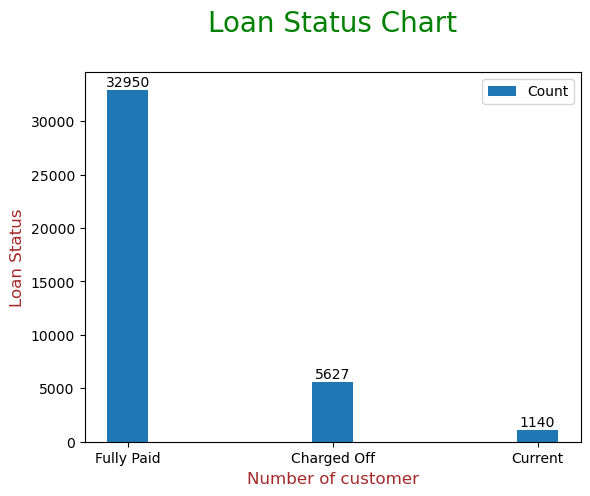

In [15]:
# take loan status variable vs occurance of the value
X = loan_data['loan_status'].value_counts().index.values
Y = loan_data['loan_status'].value_counts().values
chart1 = plt.bar(X, Y, label='Count', width=0.2)

# Adding and formatting title
plt.title("Loan Status Chart\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Number of customer", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Loan Status", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d')

plt.legend()
plt.show()

In [16]:
## Purpose of loan bar graph

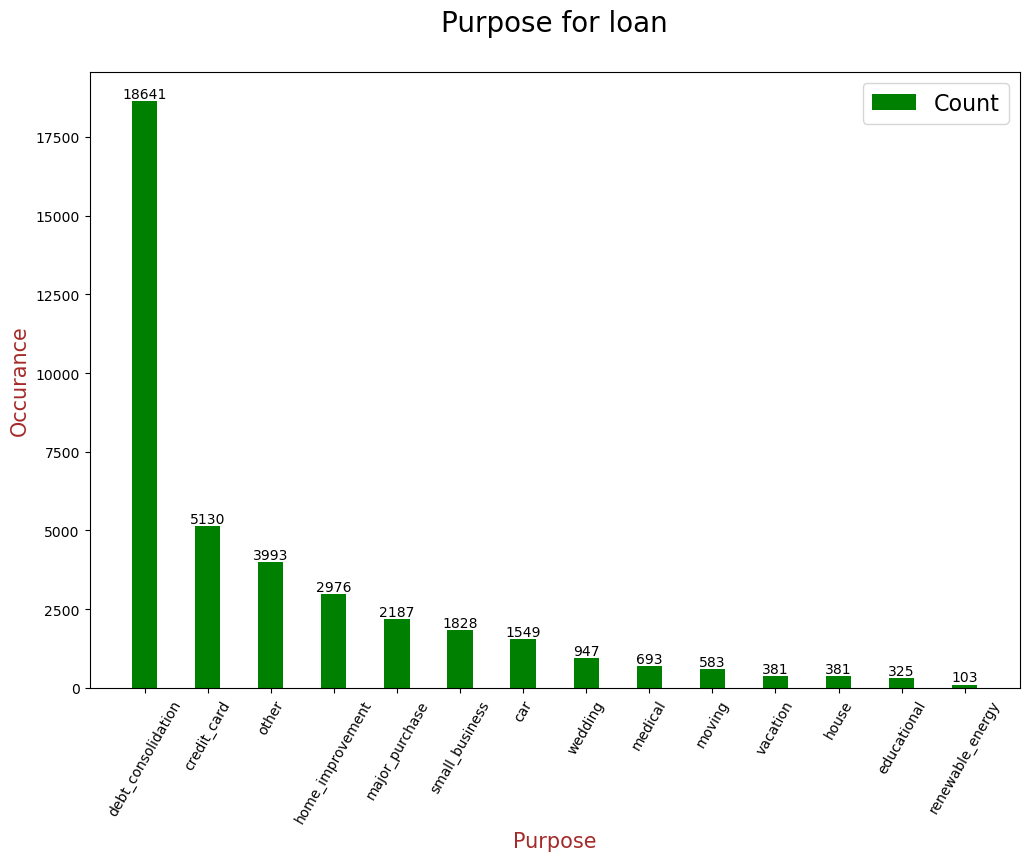

In [17]:
plt.figure(figsize=[12, 8])

# take purpose variable vs occurance of the value
X = loan_data['purpose'].value_counts().index.values
Y = loan_data['purpose'].value_counts().values
chart1 = plt.bar(X, Y, label='Count', width=0.4, color='Green')

# Adding and formatting title
plt.title("Purpose for loan\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Purpose", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.xticks(rotation=60)

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d')

plt.legend(prop={"size":16})
plt.show()

In [18]:
## State wise Loan applications

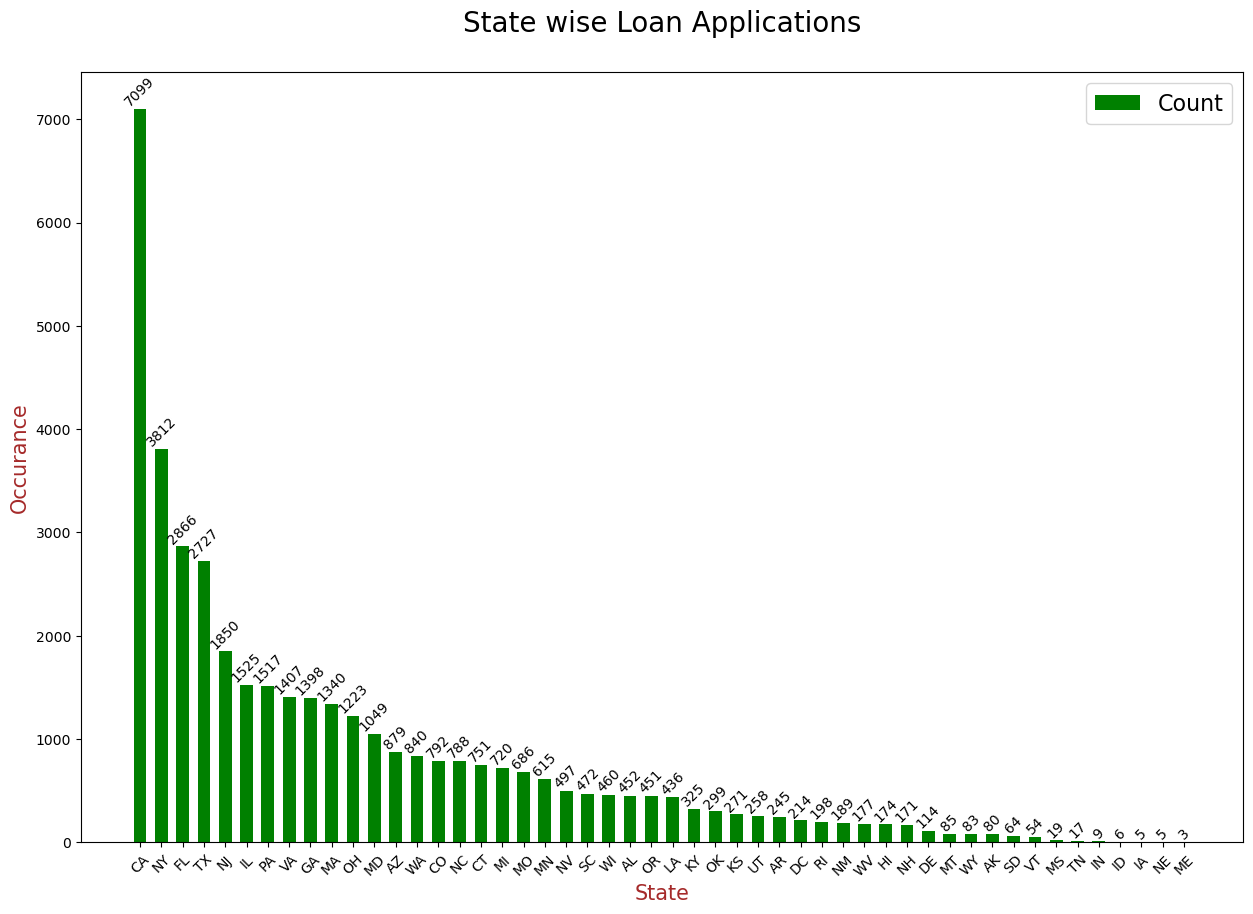

In [19]:
plt.figure(figsize=[15, 10])

# take state code variable vs occurance of the value
X = loan_data['addr_state'].value_counts().index.values
Y = loan_data['addr_state'].value_counts().values
chart1 = plt.bar(X, Y, label='Count', width=0.6, color='Green')

# Adding and formatting title
plt.title("State wise Loan Applications\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

# Labeling Axes
plt.xlabel("State", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.xticks(rotation=45)

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d', rotation=45)

plt.legend(prop={"size":16})
plt.show()

In [20]:
## Customer Count for both Tenure of loan

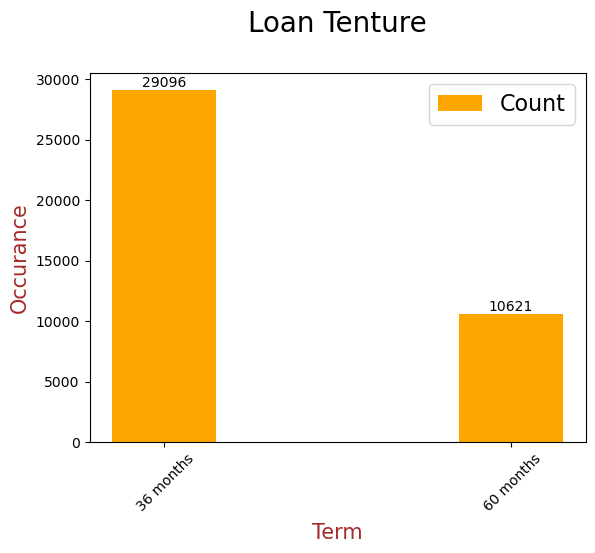

In [21]:
# take ter variable vs occurance of the value
X = loan_data['term'].value_counts().index.values
Y = loan_data['term'].value_counts().values
chart1 = plt.bar(X, Y, label='Count', width=0.3, color='Orange')

# Adding and formatting title
plt.title("Loan Tenture\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Term", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.xticks(rotation=45)

# Add count number for each bar candle
plt.bar_label(chart1, fmt='%d')

plt.legend(prop={"size":16})
plt.show()

In [22]:
## Borrower's Distribution with different dti

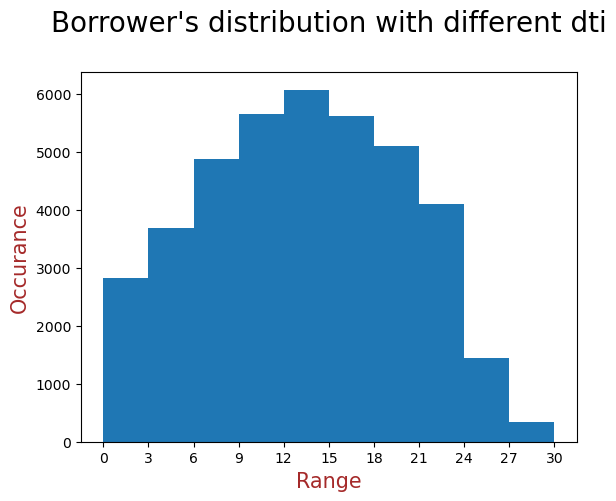

In [23]:
plt.hist(loan_data['dti'], bins=10)
plt.xticks(np.arange(0,31,3))

# Adding and formatting title
plt.title("Borrower's distribution with different dti\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})

# Labeling Axes
plt.xlabel("Range", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Occurance", fontdict={'fontsize': 15, 'fontweight' : 5, 'color' : 'Brown'})

plt.show()

# Bivariate Analysis:

In [25]:
# Currently running loan status member removed from analysis data
loan_data = loan_data[loan_data["loan_status"] != 'Current']
loan_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,installment,loan_status,grade,sub_grade,dti,verification_status,term,home_ownership,purpose,addr_state
0,1077501,5000,5000,4975.0,24000.0,10.65%,162.87,Fully Paid,B,B2,27.65,Verified,36 months,RENT,credit_card,AZ
1,1077430,2500,2500,2500.0,30000.0,15.27%,59.83,Charged Off,C,C4,1.00,Source Verified,60 months,RENT,car,GA
2,1077175,2400,2400,2400.0,12252.0,15.96%,84.33,Fully Paid,C,C5,8.72,Not Verified,36 months,RENT,small_business,IL
3,1076863,10000,10000,10000.0,49200.0,13.49%,339.31,Fully Paid,C,C1,20.00,Source Verified,36 months,RENT,other,CA
5,1075269,5000,5000,5000.0,36000.0,7.90%,156.46,Fully Paid,A,A4,11.20,Source Verified,36 months,RENT,wedding,AZ


In [26]:
## Annual Income for each Grade borrowers

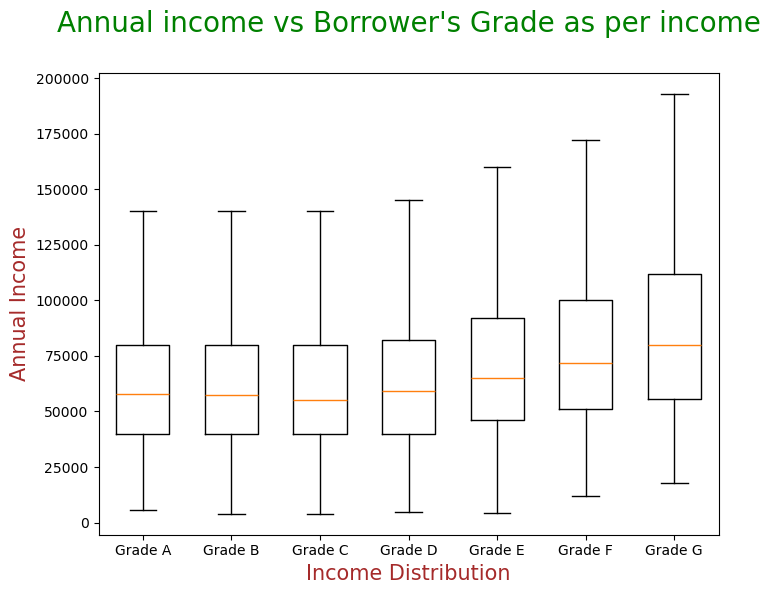

In [27]:
plt.figure(figsize=[8, 6])

# showfliers=False will remove outliers from graph
plt.boxplot([loan_data.loc[loan_data['grade'] == 'A', 'annual_inc'], 
             loan_data.loc[loan_data['grade'] == 'B', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'C', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'D', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'E', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'F', 'annual_inc'],
             loan_data.loc[loan_data['grade'] == 'G', 'annual_inc']], 
            showfliers=False, widths=(0.6))

# Adding and formatting title
plt.title("Annual income vs Borrower's Grade as per income\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

# Labeling Axes
plt.xlabel("Income Distribution", fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Brown'})
plt.ylabel("Annual Income", fontdict={'fontsize': 15, 'fontweight' : 10, 'color' : 'Brown'})

plt.xticks((1,2,3,4,5,6,7),["Grade A", "Grade B", "Grade C", "Grade D", "Grade E", "Grade F", "Grade G"])

plt.show()

## Grade VS Loan status

This graph tell about Grade VS Loan Status relationship

Grade

**Analysis:**
- For loan status catogory, grade is showing relation. The higher the grade higher the chances of fully paying the loan amount.

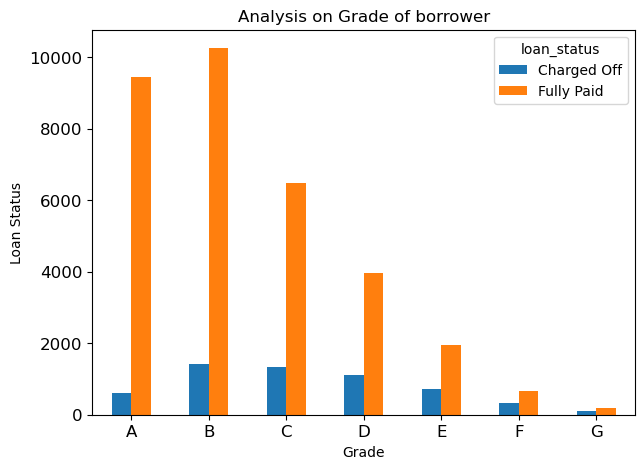

In [68]:
pivot_grade_data = loan_data.loc[:, ['grade', 'loan_status']]
df_pivot_grade = pd.pivot_table(pivot_grade_data, index=['grade'], columns= ['loan_status'], aggfunc= len)

#pivot_data
plot = df_pivot_grade.plot(kind='bar', title='Analysis on Grade of borrower', ylabel='Loan Status',
         xlabel='Grade', figsize=(7, 5), fontsize=12, rot=0)

In [69]:
# Find percetage of defaut for each Grade
df_pivot_grade["Ratio Percentage"] = ((df_pivot_grade["Charged Off"] * 100) / df_pivot_grade["Fully Paid"]).round(2)
df_pivot_grade.drop(columns = ["Charged Off", "Fully Paid"], inplace=True)
df_pivot_grade

loan_status,Ratio Percentage
grade,
A,6.38
B,13.90
C,20.76
D,28.18
E,36.70
F,48.55
G,51.01


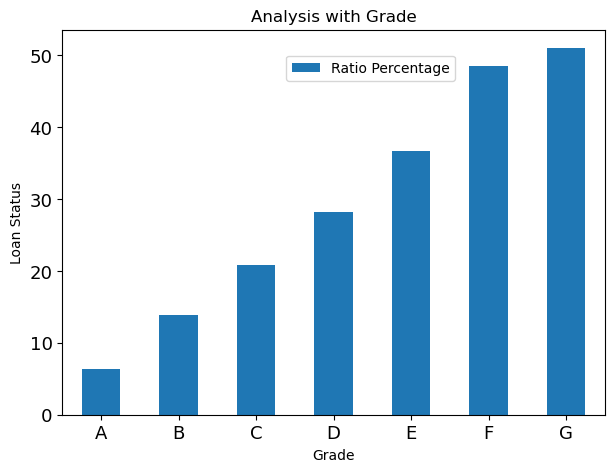

In [70]:
plot = df_pivot_grade.plot(kind='bar', title='Analysis with Grade', ylabel='Loan Status',
         xlabel='Grade', figsize=(7, 5), fontsize=13, rot=0)
plot = plot.legend(loc='center left', bbox_to_anchor=(0.4, 0.9))

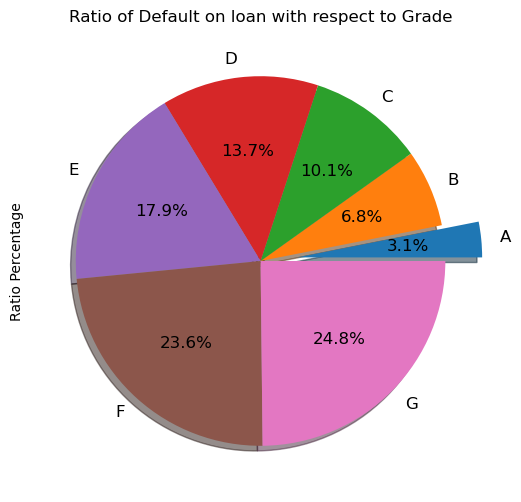

In [71]:
# Ploting Pie chart to analyse Ratio of default with respect to Grade
plot = df_pivot_grade['Ratio Percentage'].plot(kind='pie', title='Ratio of Default on loan with respect to Grade', xlabel='Loan Status', 
        figsize=(8, 6), fontsize=12, rot=0, shadow=True, explode=(0.2, 0,0 ,0,0,0,0), autopct='%1.1f%%')

## Home Ownership VS Loan status

This graph tell about home ownership VS Loan Status relationship

**Analysis:**
- Mortgage ownership have low default rate in percentage

In [74]:
pivot_home_owner_data = loan_data.loc[:, ['home_ownership', 'loan_status']]

# Drop the index whose home_ownership is NONE as per record
indexNone = pivot_home_owner_data[loan_data['home_ownership'] == 'NONE'].index
pivot_home_owner_data = pivot_home_owner_data.drop(indexNone)
df_pivot_home = pd.pivot_table(pivot_home_owner_data, index=['home_ownership'], columns= ['loan_status'], aggfunc= len)

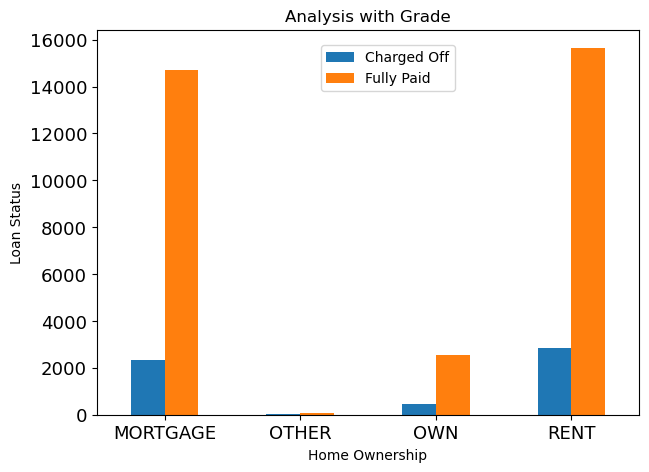

In [75]:
plot = df_pivot_home.plot(kind='bar', title='Analysis with Grade', ylabel='Loan Status',
         xlabel='Home Ownership', figsize=(7, 5), fontsize=13, rot=0)
plot = plot.legend(loc='center left', bbox_to_anchor=(0.4, 0.9))

In [76]:
# Find percetage of defaut for each Grade
df_pivot_home["Ratio Percentage"] = ((df_pivot_home["Charged Off"] * 100 )/ df_pivot_home["Fully Paid"]).round(2)
df_pivot_home.drop(columns = ["Charged Off", "Fully Paid"], inplace=True)
df_pivot_home

loan_status,Ratio Percentage
home_ownership,
MORTGAGE,15.84
OTHER,22.50
OWN,17.50
RENT,18.15


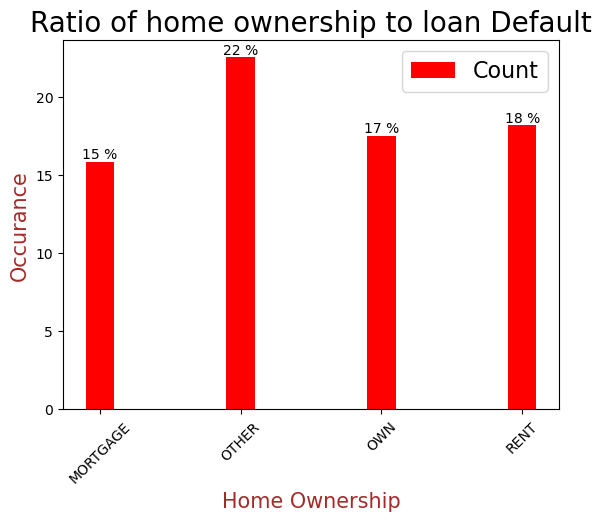

In [77]:
#plot = df_pivot_home['Ratio Percentage'].plot(kind='pie', title='Ratio of Default on loan with respect to Home Ownership', xlabel='Loan Status', 
#        figsize=(8, 6), fontsize=12, rot=0, shadow=True, explode=(0.2, 0,0 ,0), autopct='%1.1f%%')

X = df_pivot_home['Ratio Percentage'].index
Y = df_pivot_home['Ratio Percentage'].values
draw_percentage_bar_chart(X, Y, 'Ratio of home ownership to loan Default', 'Home Ownership', 'Occurance')

## dti relation on loan status

This graph tell about dti VS Loan Status relationship.

dti is debt to income ratio which tells about the expenditure of borrower.

**Analysis:**


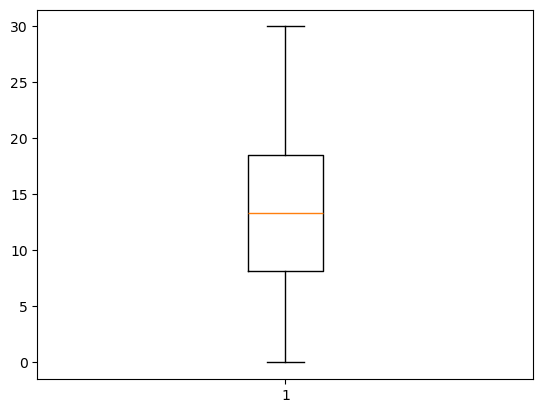

In [83]:
# Drop the index whose home_ownership is NONE as per record
indexNone = loan_data[loan_data['home_ownership'] == 'NONE'].index
df_dti_data = loan_data.drop(indexNone)
plt.boxplot(df_dti_data['dti'])
plt.show()

In [ ]:
# Find IQR range to decide bins range
Q3 = df_dti_data['dti'].quantile(0.75)
Q1 = df_dti_data['dti'].quantile(0.25)
print(Q3)
print(Q1)


- Creating Bins for creating diagram
- Taking > 18.56 = High dti
- Taking < 8.13  = Low dti
- Taking 8.13 <-> 18.56 = Medium dti

In [84]:
df_dti_data.loc[df_dti_data['dti'] >= 18.56, 'dti_bins'] = 'high'
df_dti_data.loc[df_dti_data['dti'] <= 8.13, 'dti_bins'] = 'low'
df_dti_data.loc[(df_dti_data['dti'] > 8.13) & (df_dti_data['dti'] < 18.56), 'dti_bins'] = 'medium'
df_dti_data.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,annual_inc,int_rate,installment,loan_status,grade,sub_grade,dti,verification_status,term,home_ownership,purpose,addr_state,dti_bins
0,1077501,5000,5000,4975.0,24000.0,10.65%,162.87,Fully Paid,B,B2,27.65,Verified,36 months,RENT,credit_card,AZ,high
1,1077430,2500,2500,2500.0,30000.0,15.27%,59.83,Charged Off,C,C4,1.00,Source Verified,60 months,RENT,car,GA,low
2,1077175,2400,2400,2400.0,12252.0,15.96%,84.33,Fully Paid,C,C5,8.72,Not Verified,36 months,RENT,small_business,IL,medium
3,1076863,10000,10000,10000.0,49200.0,13.49%,339.31,Fully Paid,C,C1,20.00,Source Verified,36 months,RENT,other,CA,high
5,1075269,5000,5000,5000.0,36000.0,7.90%,156.46,Fully Paid,A,A4,11.20,Source Verified,36 months,RENT,wedding,AZ,medium


In [85]:
df_dti_data = df_dti_data.loc[:, ['dti_bins',  'loan_status']]
df_dti_data.head()

,dti_bins,loan_status
0,high,Fully Paid
1,low,Charged Off
2,medium,Fully Paid
3,high,Fully Paid
5,medium,Fully Paid


In [86]:
pivot_dti_data = pd.pivot_table(df_dti_data, index=['dti_bins'], columns= ['loan_status'], aggfunc= len)
pivot_dti_data

loan_status,Charged Off,Fully Paid
dti_bins,,
high,1617,8029
low,1192,8458
medium,2818,16460


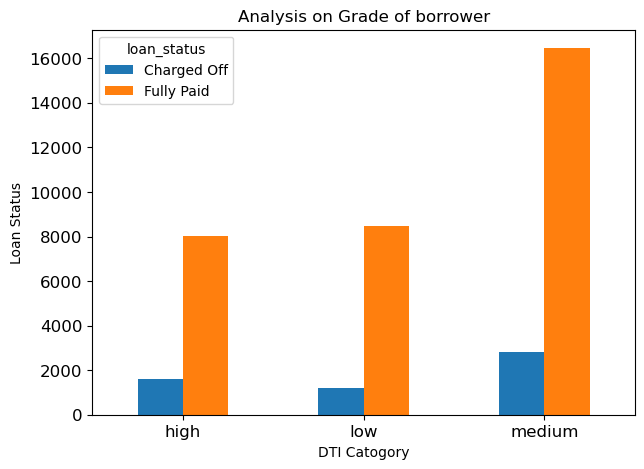

In [87]:
plot = pivot_dti_data.plot(kind='bar', title='Analysis on Grade of borrower', ylabel='Loan Status',
         xlabel='DTI Catogory', figsize=(7, 5), fontsize=12, rot=0)

In [88]:
# Find percetage of defaut for each Grade
pivot_dti_data["Ratio Percentage"] = ((pivot_dti_data["Charged Off"] * 100) / pivot_dti_data["Fully Paid"]).round(2)
pivot_dti_data.drop(columns = ["Charged Off", "Fully Paid"], inplace=True)
pivot_dti_data['Ratio Percentage']

dti_bins
high      20.14
low       14.09
medium    17.12
Name: Ratio Percentage, dtype: float64

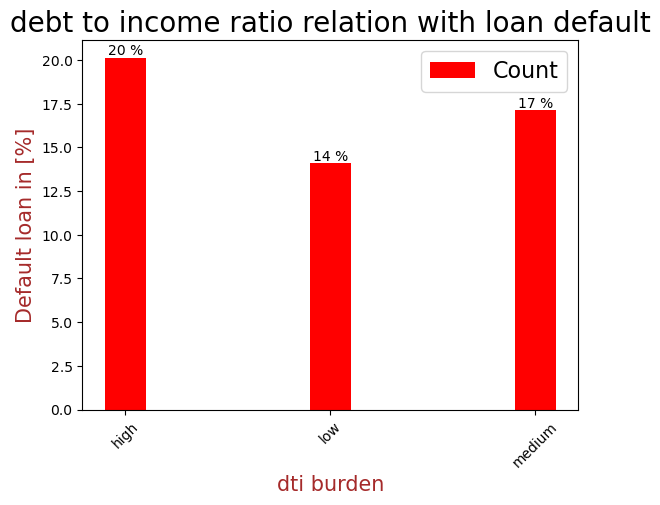

In [89]:
# Draw graph to find out percentage
X = pivot_dti_data['Ratio Percentage'].index
Y = pivot_dti_data['Ratio Percentage'].values
draw_percentage_bar_chart(X, Y, 'debt to income ratio relation with loan default', 'dti burden', 'Default loan in [%]')


## Relation of loan on Tenure of loan (term)


This graph tell about dti VS Loan Status relationship.

dti is debt to income ratio which tells about the expenditure of borrower.

**Analysis:**
- It is observed that, borrower who have "36 month" tenure are more in count and complete the loan successfully.

In [80]:
df_term_data = loan_data.loc[:, ['dti', 'term', 'loan_status']]
df_term_data.loc[df_term_data['dti'] >= 18.56, 'dti_bins'] = 'high'
df_term_data.loc[df_term_data['dti'] <= 8.13, 'dti_bins'] = 'low'
df_term_data.loc[(df_term_data['dti'] > 8.13) & (df_term_data['dti'] < 18.56), 'dti_bins'] = 'medium'
df_term_data.drop(columns=['dti'], inplace=True)
df_term_data.head()

,term,loan_status,dti_bins
0,36 months,Fully Paid,high
1,60 months,Charged Off,low
2,36 months,Fully Paid,medium
3,36 months,Fully Paid,high
5,36 months,Fully Paid,medium


In [81]:
df_term_data = pd.pivot_table(df_term_data, index=['term'], columns= ['loan_status'], aggfunc= len)
df_term_data

dti_bins           
loan_status Charged Off Fully Paid
term                              
 36 months         3227      25869
 60 months         2400       7081

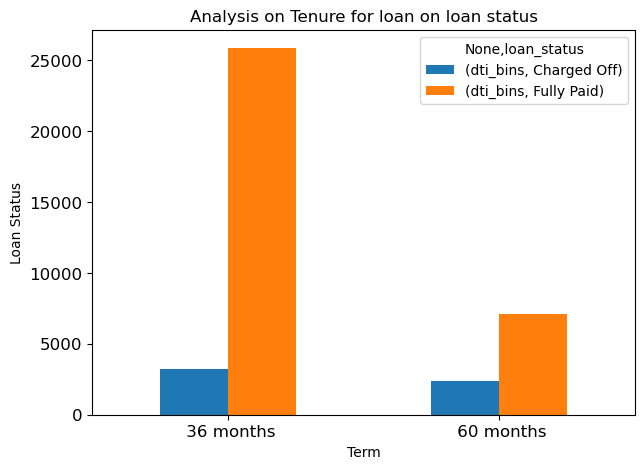

In [82]:
plot = df_term_data.plot(kind='bar', title='Analysis on Tenure for loan on loan status', ylabel='Loan Status',
         xlabel='Term', figsize=(7, 5), fontsize=12, rot=0)